In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('bank.csv',delimiter=';')#read the dataset

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.describe()# describe the dataset

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.shape#shape of the dataset

(41188, 21)

In [6]:
df.isnull().sum()#there is no missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

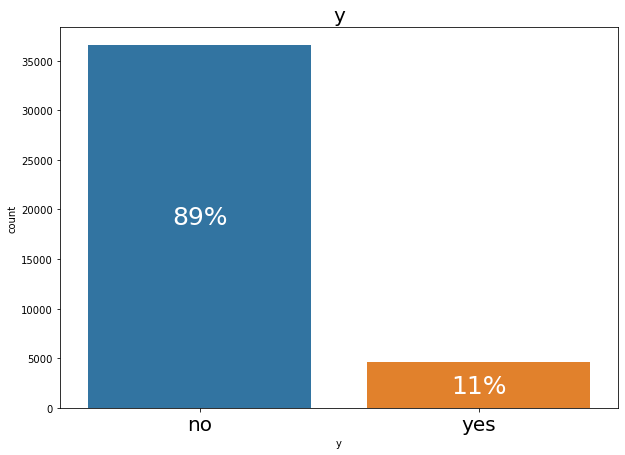

In [7]:
plt.figure(figsize=(10,7))
sns.countplot(x="y", data=df)
percentage_y = df['y'].agg('value_counts', normalize=True) * 100
plt.title("y",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.text(0, 18000, "{:.2g}%".format(percentage_y[0]),  ha='center', va='bottom', size=25, color='w')
plt.text(1, 1000, "{:.2g}%".format(percentage_y[1]),  ha='center', va='bottom', size=25, color='w')
plt.show()

In [8]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [9]:
categorical_features = df.select_dtypes(include=[np.object]) #Finding categorical features in bank dataset
categorical_features.columns

/tmp/ipykernel_69802/3532178444.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]) #Finding categorical features in bank dataset


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

#### label encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()
df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['education'] = label_encoder.fit_transform(df['education'])
df['default'] = label_encoder.fit_transform(df['default'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['month'] = label_encoder.fit_transform(df['month'])
df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])
df['y'] = label_encoder.fit_transform(df['y'])




In [12]:
df.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

### SELECTING THE IMPORTANT FEATURES USING RANDOMFORESTCLASSIFIER

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [14]:
from sklearn. model_selection import train_test_split

In [15]:
X = df.drop(['y'],axis=1)
y = df[['y']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

In [17]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train,y_train)


/home/eswar/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier())

In [18]:
sel.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True])

In [19]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

4

In [20]:
print(selected_feat)

Index(['age', 'duration', 'euribor3m', 'nr.employed'], dtype='object')


### OVERSAMPLING USING SMOTR=E FOR IMBALANCED DATA

In [21]:
from imblearn.over_sampling import SMOTE
 
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff0cc617550>
Traceback (most recent call last):
  File "/home/eswar/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/eswar/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/eswar/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/eswar/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [22]:
y_train_sm.value_counts()

y
0    25579
1    25579
dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
X=df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'y'],axis=1)
Y=df['y']

In [25]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=0)

In [26]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
predictions=model.predict(x_test)


In [31]:
model.score(x_train,y_train)


0.9020845617564427

In [32]:
model.score(x_test,y_test)

0.9066116371287529

### ADABOOST

In [33]:
from sklearn.ensemble import AdaBoostClassifier


In [34]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [35]:
model.score(x_train, y_train)

0.9030210537268912

In [36]:
model.score(x_test, y_test)

0.9072590434571498

### NAIVE BAYES

In [38]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_predict = gnb.predict(x_test)

In [39]:
gnb.score(x_train, y_train)

0.8869966355658839

In [40]:
gnb.score(x_test, y_test)

0.893825362142915

### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier


In [42]:
NNHH = KNeighborsClassifier(n_neighbors= 49 ,metric='euclidean' )

In [43]:
NNHH.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=49)

In [44]:
y_predi = NNHH.predict(x_test)


In [45]:
NNHH.score(x_train, y_train)


0.9103742499393015

In [46]:
NNHH.score(x_test, y_test)


0.909686817188638

### SVM

In [50]:
from sklearn import svm
svm = svm.SVC(kernel='linear',gamma=0.025, C=3) 
svm.fit(x_train, y_train)
y_preds = svm.predict(x_test)

In [51]:
svm.score(x_train, y_train)

0.8940376677881448

In [52]:
svm.score(x_test, y_test)


0.8949583232176095

### Q4. Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or no
​

We can see that except Naive Bayes the other methods seems to perform well. Logistic Regression seems to be doing better in my opinion since it has little difference between Train and Test Scores and the highest Test Score

In [53]:
# Application of all Machine Learning methods
MLA = [model,abc,gnb,NNHH,svm]

In [54]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

In [55]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
3,KNeighborsClassifier,0.9104,0.9097,0.641079,0.445245,0.706851
0,AdaBoostClassifier,0.9030,0.9073,0.652010,0.373919,0.674333
1,AdaBoostClassifier,0.9030,0.9073,0.652010,0.373919,0.674333
4,SVC,0.8940,0.8950,0.656250,0.136167,0.563571
2,GaussianNB,0.8870,0.8938,0.523515,0.609510,0.769656


## part 2: time series

In [56]:
Onion=pd.read_csv('MonthWiseMarketArrivals_Clean.csv')
onion=Onion.copy()

In [57]:
onion.shape

(10227, 10)

In [58]:
onion.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [59]:
onion.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

### Modal price of onion for each month for the Mumbai

In [60]:
mp=pd.concat([onion.date,onion.priceMod],axis=1)

In [61]:
mp.set_index('date')

,priceMod
date,
January-2005,446
January-2006,563
January-2010,1460
January-2011,3433
January-2012,605
...,...
December-2011,526
December-2012,1136
December-2013,1177
